<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/ML-LAB/blob/main/Featureselection(practicce).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount(('/content/mydrive'))

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [13]:
df=pd.read_csv("/content/mydrive/MyDrive/house_price_train.csv")

In [14]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
print(df.shape)
print(df.info)

(1460, 81)
<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     Lan

In [17]:
constant_feature=[col for col in df.columns if df[col].nunique==1]

In [18]:
print(constant_feature)

[]


In [19]:
quasi_constant_features = []
threshold = 0.99

for col in df.columns:
    top_freq = (df[col].value_counts() / len(df)).iloc[0]
    if top_freq > threshold:
        quasi_constant_features.append(col)

print(f"Quasi-constant features ({len(quasi_constant_features)}): {quasi_constant_features}")


Quasi-constant features (3): ['Street', 'Utilities', 'PoolArea']


In [20]:
# Find duplicate features
duplicate_features = set()
features = df.columns

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        if df[features[i]].equals(df[features[j]]):
            duplicate_features.add(features[j])

print(f"Duplicate features ({len(duplicate_features)}): {list(duplicate_features)}")


Duplicate features (0): []


In [21]:
df.drop(columns=quasi_constant_features , inplace=True)

In [22]:
df.shape


(1460, 78)

In [46]:
target='SalePrice'
X=df.drop(columns=[target])
y=df[target]



In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2 ,random_state=42)

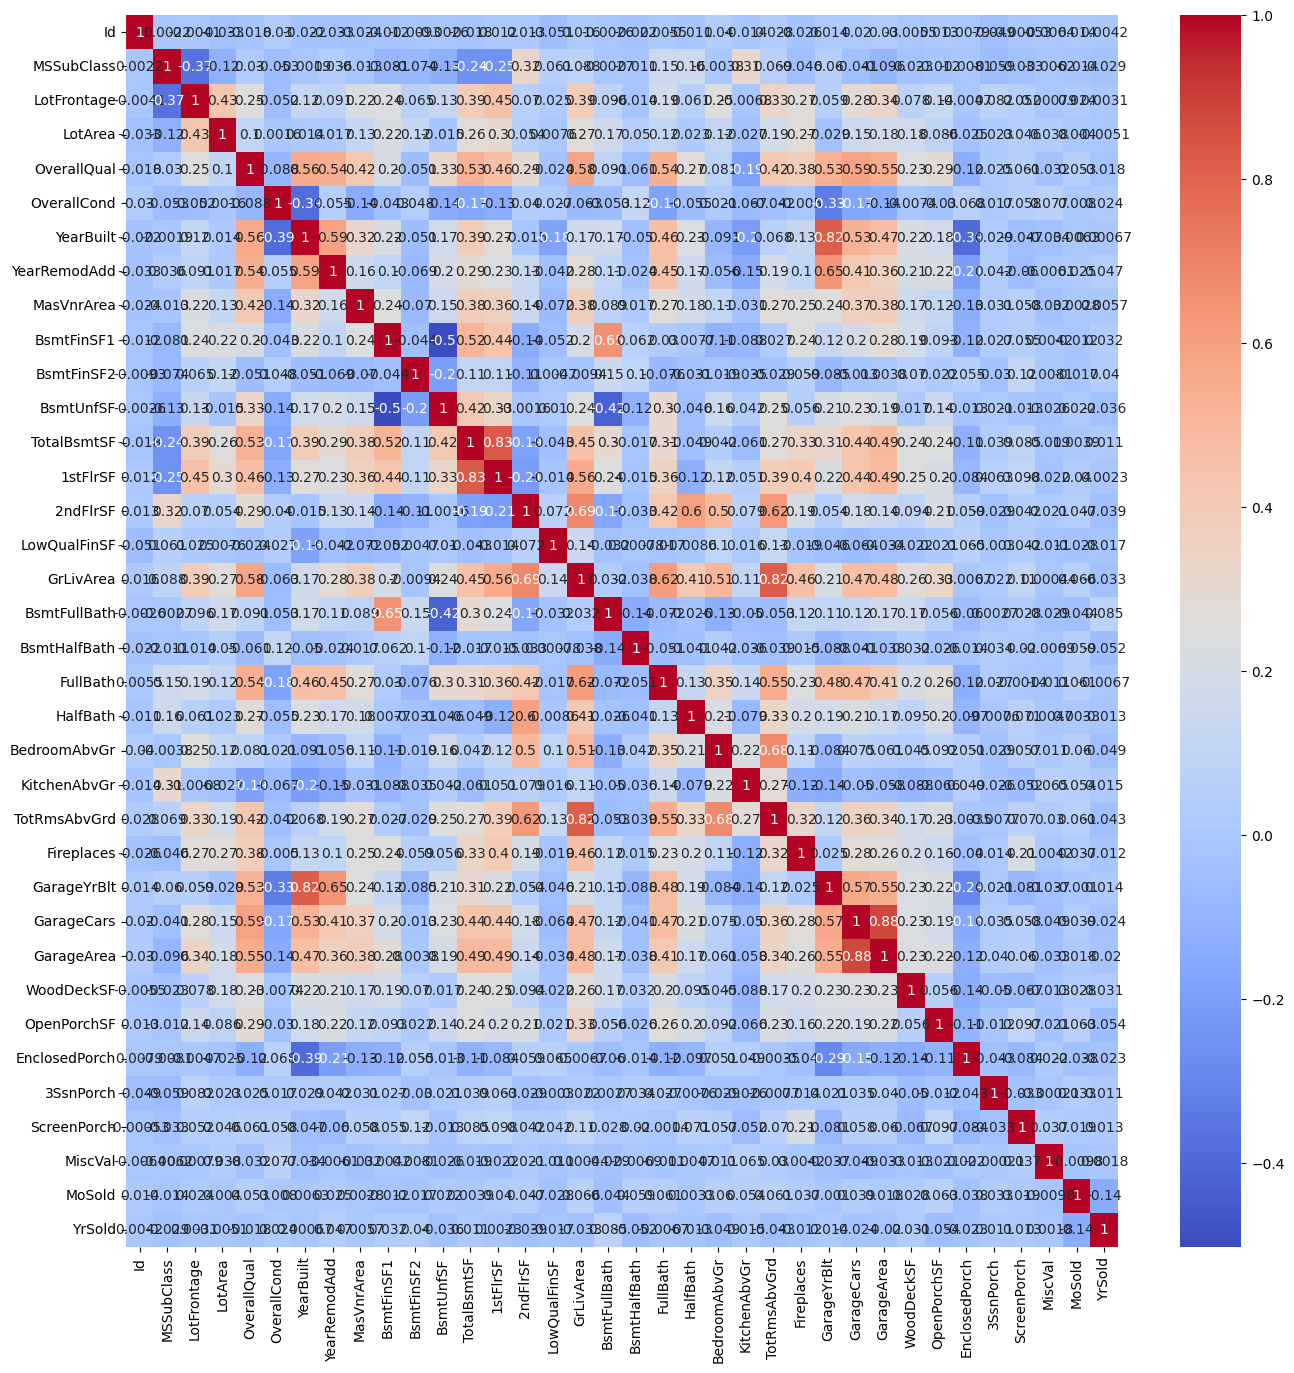

In [25]:
# Select only numeric columns
numeric_X_train = X_train.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corrmat = numeric_X_train.corr()

# Plot heatmap
fig, ax = plt.subplots()
fig.set_size_inches(16, 16)
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
grouped_features=[]
correlated_features=[]
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr
  print(col_corr)

In [31]:
corr_features=correlation(X_train.select_dtypes(include=np.number),0.9)
correlated_features=set(corr_features)
print(len(correlated_features))

0


In [32]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


In [35]:
for col in categorical_cols:
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode)


In [37]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

# Encode categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()

X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])

# Now compute MI
mi_scores = mutual_info_regression(X_train, y_train)


[3.95032929e-04 2.81988665e-01 1.12539479e-01 1.72696410e-01
 1.75592953e-01 1.67614381e-02 6.72077091e-02 3.93852552e-02
 2.18355909e-02 0.00000000e+00 4.73910963e-01 4.11289401e-02
 3.27493097e-02 4.89128046e-02 1.06205762e-01 5.20418838e-01
 1.04790469e-01 3.35475689e-01 2.32602589e-01 1.21027511e-02
 7.41127893e-05 1.46884011e-01 1.83626996e-01 6.54228830e-02
 8.06526526e-02 2.88222016e-01 4.72129886e-02 1.89083001e-01
 3.12203582e-01 3.15987821e-02 7.16882045e-02 1.61877561e-01
 1.43684108e-01 1.76933263e-02 0.00000000e+00 1.50886255e-01
 3.46530170e-01 7.43814302e-03 1.75011840e-01 7.33628515e-02
 5.81049540e-02 2.96481063e-01 2.00782402e-01 4.89447991e-04
 4.55050810e-01 3.02374533e-02 6.10714227e-03 2.48947636e-01
 6.73760757e-02 6.26594664e-02 2.56017867e-02 3.07935670e-01
 1.77723180e-01 0.00000000e+00 1.73981680e-01 6.87426823e-02
 1.28384469e-01 2.76096106e-01 2.51604457e-01 3.49142567e-01
 3.58654501e-01 1.22173801e-03 1.13920454e-02 5.15415385e-02
 8.72514207e-02 1.563916

In [39]:
from sklearn.feature_selection import chi2

# Apply to non-negative features (e.g., count data)
chi_scores, p_values = chi2(X_train, y_train)
print(chi_scores)

[1.30897689e+05 1.68512153e+04 8.93509256e+01 4.70422525e+03
 1.06167456e+07 6.05603521e+02 6.91314023e+02 1.02341153e+02
 5.04965128e+02 7.83153669e+02 1.95295351e+03 1.75519550e+02
 1.44915845e+01 1.70646960e+03 7.40026092e+02 2.95504605e+02
 1.28660696e+02 3.78342311e+02 1.56928524e+02 3.03777084e+02
 1.02164292e+02 5.90692045e+02 6.94934917e+02 6.59711951e+01
 2.30619255e+05 1.67289380e+02 8.47023785e+01 2.49801499e+02
 2.74953657e+02 9.21831532e+01 3.70742750e+02 6.89169051e+02
 3.25583428e+05 8.83816788e+01 2.79208972e+05 2.37327894e+05
 1.41254579e+05 6.61677005e+01 1.25654762e+03 4.95225647e+01
 1.19133071e+02 1.00149926e+05 3.81759587e+05 2.03853316e+05
 1.56218858e+05 3.81960001e+02 4.61393724e+02 1.53386922e+02
 4.43063677e+02 1.37949251e+02 2.54427678e+01 2.45235505e+02
 2.89157420e+02 8.27294085e+01 4.73324726e+02 2.17608398e+02
 8.91154071e+02 2.11017251e+02 4.26174379e+02 2.60131354e+02
 7.64054348e+04 4.66245767e+01 3.18118514e+01 7.69788440e+01
 1.16601749e+05 6.360084

In [40]:
print(p_values)

[0.00000000e+000 0.00000000e+000 1.00000000e+000 0.00000000e+000
 0.00000000e+000 1.46183624e-001 3.55712356e-004 1.00000000e+000
 9.76415569e-001 6.65121319e-009 1.27603962e-150 1.00000000e+000
 1.00000000e+000 1.03526539e-113 1.85774451e-006 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 2.65896790e-001 2.51305591e-004 1.00000000e+000
 0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 4.35527973e-004
 0.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 1.12206680e-053 1.00000000e+000
 1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 1.00000000e+000 9.99694952e-001 1.00000000e+000
 9.99975620e-001 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 9.98749807e-001 1.00000000e+000
 1.54799088e-016 1.00000000e+000 9.99998435e-001 1.00000000e+000
 0.00000000e+000 1.000000

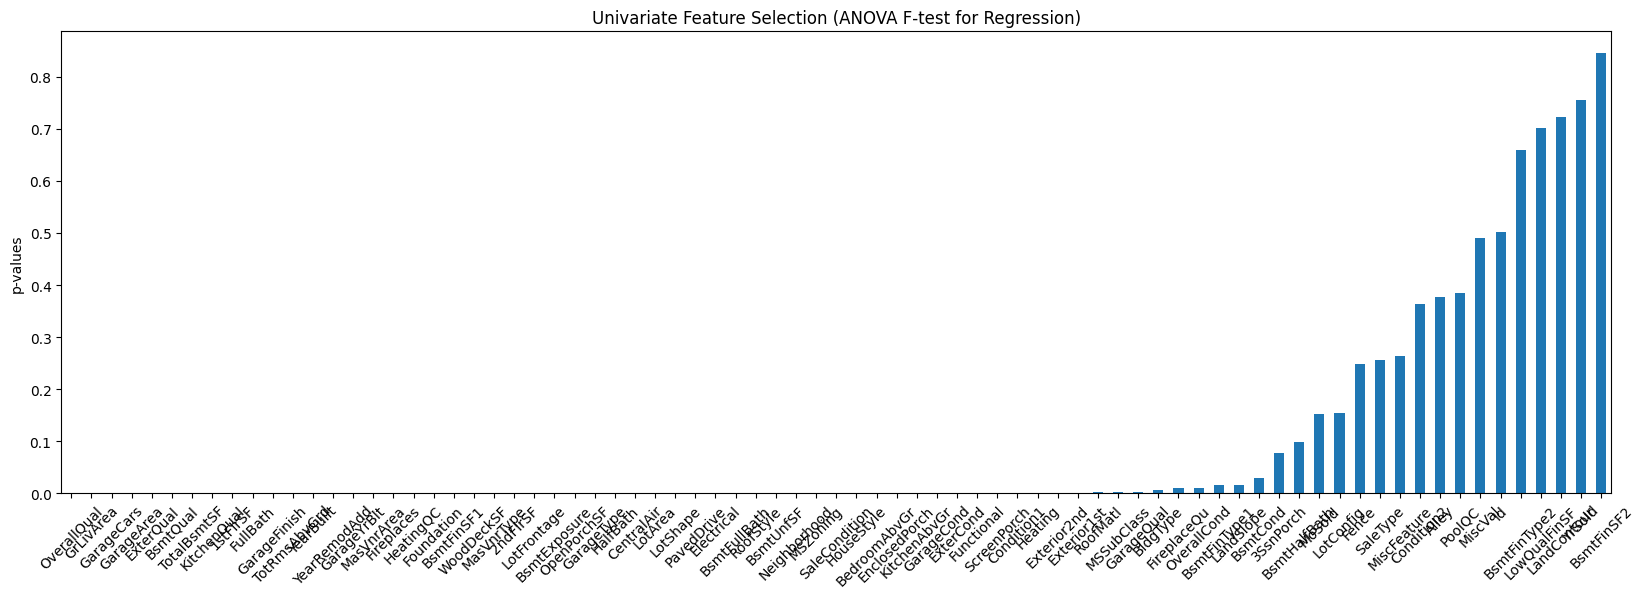

In [41]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X_train, y_train)
univariate = pd.Series(p_values, index=X_train.columns)

# Plot sorted p-values
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6), rot=45)
plt.ylabel("p-values")
plt.title("Univariate Feature Selection (ANOVA F-test for Regression)")
plt.show()

In [44]:
numerics=['int16','int32','int64','float16','float32','float64']
numericals=list(df.select_dtypes(include=numerics).columns)
df=df[numericals]
df.shape

(1460, 37)

In [48]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Store R² scores
r2_values = []

for feature in X_train.columns:
    model = DecisionTreeRegressor(random_state=42)

    # Handle missing values by filling with 0
    model.fit(X_train[feature].fillna(0).to_frame(), y_train)

    y_pred = model.predict(X_test[feature].fillna(0).to_frame())

    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

# Convert to Series for easy viewing
r2_values = pd.Series(r2_values, index=X_train.columns)

# Sort descending: best features first
r2_values = r2_values.sort_values(ascending=False)

print("R² scores of single features:")
print(r2_values)

# How many features explain variance better than random (R² > 0)?
print("\nNumber of useful features (R² > 0):", len(r2_values[r2_values > 0]))


R² scores of single features:
OverallQual      0.719317
GarageCars       0.515777
GrLivArea        0.370245
FullBath         0.353591
GarageYrBlt      0.343766
TotRmsAbvGrd     0.341351
TotalBsmtSF      0.329614
YearBuilt        0.320113
GarageArea       0.314634
YearRemodAdd     0.282999
LotFrontage      0.270296
1stFlrSF         0.246180
Fireplaces       0.240746
MSSubClass       0.230625
OpenPorchSF      0.142360
OverallCond      0.133132
HalfBath         0.108993
BsmtFullBath     0.052582
BedroomAbvGr     0.017040
KitchenAbvGr     0.011491
MiscVal          0.009357
LowQualFinSF     0.006675
BsmtFinSF2       0.004516
MoSold           0.000686
YrSold          -0.002550
3SsnPorch       -0.004439
BsmtHalfBath    -0.011510
ScreenPorch     -0.013370
EnclosedPorch   -0.020444
2ndFlrSF        -0.035629
WoodDeckSF      -0.069681
BsmtFinSF1      -0.081682
LotArea         -0.144431
MasVnrArea      -0.165661
BsmtUnfSF       -0.332140
Id              -0.679166
dtype: float64

Number of useful f